In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error
import os

In [2]:
BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - 10062025.csv') # -- cambiar solo la fecha del fichero 

df_RRHH = pd.read_csv(csv_path)

df_RRHH

ID  Reason_absence  Month_absence  Day_week  Seasons  \
0    14              11             11         2        4   
1    36              13              4         4        3   
2     9               6              7         3        1   
3    28               9              7         3        1   
4     9              12              3         3        2   
..   ..             ...            ...       ...      ...   
735   2               0              6         2        3   
736  21               0              6         2        3   
737   4               0              0         3        1   
738   8               0              0         4        2   
739  35               0              0         6        3   

     Transportation_expense  Distance_Residence_Work  Service_time  Age  \
0                       155                       12            14   34   
1                       118                       13            18   50   
2                       228                       14            16   58   
3                       225                       26             9   28   
4                       228                       14            16   58   
..                      ...                      ...           ...  ...   
735                     235                       29            12   48   
736                     268                       11             8   33   
737                     118                       14            13   40   
738                     231                       35            14   39   
739                     179                       45            14   53   

    Work_load_Average_day  ...  Disciplinary_failure  Education  Son  \
0                 284,031  ...                     0          1    2   
1                 239,409  ...                     0          1    1   
2                 264,604  ...                     0          1    2   
3                 230,290  ...                     0          1    1   
4                 222,196  ...                     0          1    2   
..                    ...  ...                   ...        ...  ...   
735               275,089  ...                     1          1    1   
736               275,089  ...                     1          2    0   
737               271,219  ...                     0          1    1   
738               271,219  ...                     0          1    2   
739               271,219  ...                     0          1    1   

     Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
0                 1              0    0      95     196               25   
1                 1              0    0      98     178               31   
2                 0              0    1      65     172               22   
3                 0              0    2      69     169               24   
4                 0              0    1      65     172               22   
..              ...            ...  ...     ...     ...              ...   
735               0              1    5      88     163               33   
736               0              0    0      79     178               25   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism_hours  
0                  120  
1                  120  
2                  120  
3                  112  
4                  112  
..                 ...  
735                  0  
736                  0  
737                  0  
738                  0  
739                  0  

[740 rows x 21 columns]

In [3]:
df_RRHH.columns

Index(['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons',
       'Transportation_expense', 'Distance_Residence_Work', 'Service_time',
       'Age', 'Work_load_Average_day', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight',
       'Height', 'Body_mass_index', 'Absenteeism_hours'],
      dtype='object')

In [4]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: muestra todo el ancho (evita recortes por pantalla estrecha)
pd.set_option('display.width', None)

# Opcional: ajusta el ancho máximo de cada columna si es muy largo
pd.set_option('display.max_colwidth', None)

In [5]:
df_RRHH.head(15)

ID  Reason_absence  Month_absence  Day_week  Seasons  \
0   14              11             11         2        4   
1   36              13              4         4        3   
2    9               6              7         3        1   
3   28               9              7         3        1   
4    9              12              3         3        2   
5   11              19              3         2        3   
6   36              13              6         4        3   
7   14              18             12         3        2   
8   13              13              7         2        1   
9   34              19             12         3        4   
10  22               1             10         4        4   
11  26              19              5         6        3   
12  34              19             12         3        4   
13  20              19              4         6        3   
14  14              10              5         2        3   

    Transportation_expense  Distance_Residence_Work  Service_time  Age  \
0                      155                       12            14   34   
1                      118                       13            18   50   
2                      228                       14            16   58   
3                      225                       26             9   28   
4                      228                       14            16   58   
5                      289                       36            13   33   
6                      118                       13            18   50   
7                      155                       12            14   34   
8                      369                       17            12   31   
9                      118                       10            10   37   
10                     179                       26             9   30   
11                     300                       26            13   43   
12                     118                       10            10   37   
13                     260                       50            11   36   
14                     155                       12            14   34   

   Work_load_Average_day  Hit_target  Disciplinary_failure  Education  Son  \
0                284,031          97                     0          1    2   
1                239,409          98                     0          1    1   
2                264,604          93                     0          1    2   
3                230,290          92                     0          1    1   
4                222,196          99                     0          1    2   
5                222,196          99                     0          1    2   
6                377,550          94                     0          1    1   
7                280,549          98                     0          1    2   
8                264,604          93                     0          1    3   
9                261,306          97                     0          1    0   
10               265,017          88                     0          3    0   
11               237,656          99                     0          1    2   
12               261,306          97                     0          1    0   
13               326,452          96                     0          1    4   
14               237,656          99                     0          1    2   

    Social_drinker  Social_smoker  Pet  Weight  Height  Body_mass_index  \
0                1              0    0      95     196               25   
1                1              0    0      98     178               31   
2                0              0    1      65     172               22   
3                0              0    2      69     169               24   
4                0              0    1      65     172               22   
5                1              0    1      90     172               30   
6                1              0    0      98     178               31   
7        

In [6]:
df_RRHH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       740 non-null    int64 
 1   Reason_absence           740 non-null    int64 
 2   Month_absence            740 non-null    int64 
 3   Day_week                 740 non-null    int64 
 4   Seasons                  740 non-null    int64 
 5   Transportation_expense   740 non-null    int64 
 6   Distance_Residence_Work  740 non-null    int64 
 7   Service_time             740 non-null    int64 
 8   Age                      740 non-null    int64 
 9   Work_load_Average_day    740 non-null    object
 10  Hit_target               740 non-null    int64 
 11  Disciplinary_failure     740 non-null    int64 
 12  Education                740 non-null    int64 
 13  Son                      740 non-null    int64 
 14  Social_drinker           740 non-null    i

## Exploratory Data Analysis

* Resúmenes estadísticos

In [7]:
df_RRHH.describe()

ID  Reason_absence  Month_absence    Day_week     Seasons  \
count  740.000000      740.000000     740.000000  740.000000  740.000000   
mean    18.017568       19.216216       6.324324    3.914865    2.544595   
std     11.021247        8.433406       3.436287    1.421675    1.111831   
min      1.000000        0.000000       0.000000    2.000000    1.000000   
25%      9.000000       13.000000       3.000000    3.000000    2.000000   
50%     18.000000       23.000000       6.000000    4.000000    3.000000   
75%     28.000000       26.000000       9.000000    5.000000    4.000000   
max     36.000000       28.000000      12.000000    6.000000    4.000000   

       Transportation_expense  Distance_Residence_Work  Service_time  \
count              740.000000               740.000000    740.000000   
mean               221.329730                29.631081     12.554054   
std                 66.952223                14.836788      4.384873   
min                118.000000                 5.000000      1.000000   
25%                179.000000                16.000000      9.000000   
50%                225.000000                26.000000     13.000000   
75%                260.000000                50.000000     16.000000   
max                388.000000                52.000000     29.000000   

              Age  Hit_target  Disciplinary_failure   Education         Son  \
count  740.000000  740.000000            740.000000  740.000000  740.000000   
mean    36.450000   94.587838              0.054054    1.291892    1.018919   
std      6.478772    3.779313              0.226277    0.673238    1.098489   
min     27.000000   81.000000              0.000000    1.000000    0.000000   
25%     31.000000   93.000000              0.000000    1.000000    0.000000   
50%     37.000000   95.000000              0.000000    1.000000    1.000000   
75%     40.000000   97.000000              0.000000    1.000000    2.000000   
max     58.000000  100.000000              1.000000    4.000000    4.000000   

       Social_drinker  Social_smoker         Pet      Weight      Height  \
count      740.000000     740.000000  740.000000  740.000000  740.000000   
mean         0.567568       0.072973    0.745946   79.035135  172.114865   
std          0.495749       0.260268    1.318258   12.883211    6.034995   
min          0.000000       0.000000    0.000000   56.000000  163.000000   
25%          0.000000       0.000000    0.000000   69.000000  169.000000   
50%          1.000000       0.000000    0.000000   83.000000  170.000000   
75%          1.000000       0.000000    1.000000   89.000000  172.000000   
max          1.000000       1.000000    8.000000  108.000000  196.000000   

       Body_mass_index  Absenteeism_hours  
count       740.000000         740.000000  
mean         26.677027           6.924324  
std           4.285452          13.330998  
min          19.000000           0.000000  
25%          24.000000           2.000000  
50%          25.000000           3.000000  
75%          31.000000           8.000000  
max          38.000000         120.000000

# Visualizaciones iniciales
* Perfil general de empleados

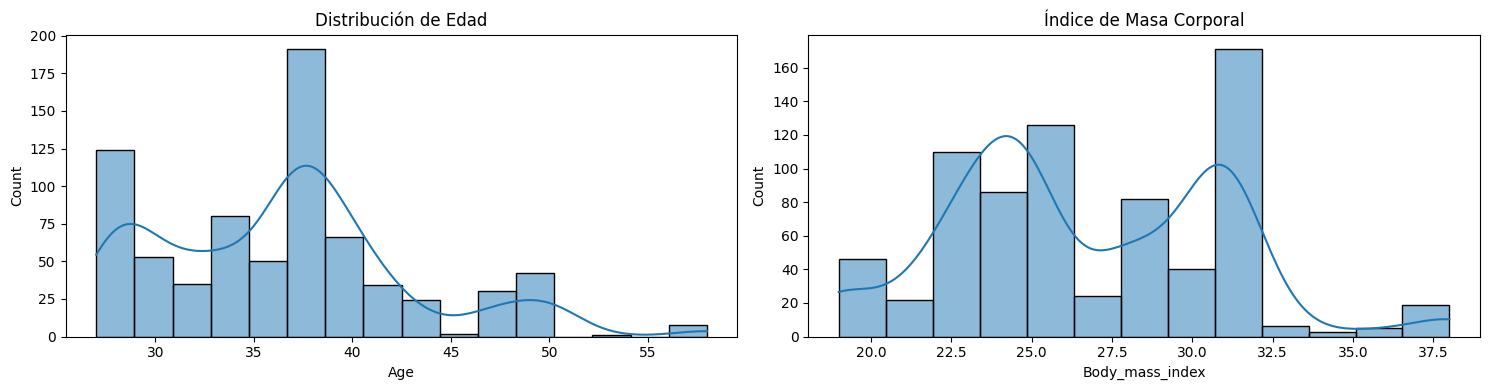

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(df_RRHH['Age'], kde=True, ax=axs[0])
axs[0].set_title("Distribución de Edad")

sns.histplot(df_RRHH['Body_mass_index'], kde=True, ax=axs[1])
axs[1].set_title("Índice de Masa Corporal")

plt.tight_layout()
plt.show()

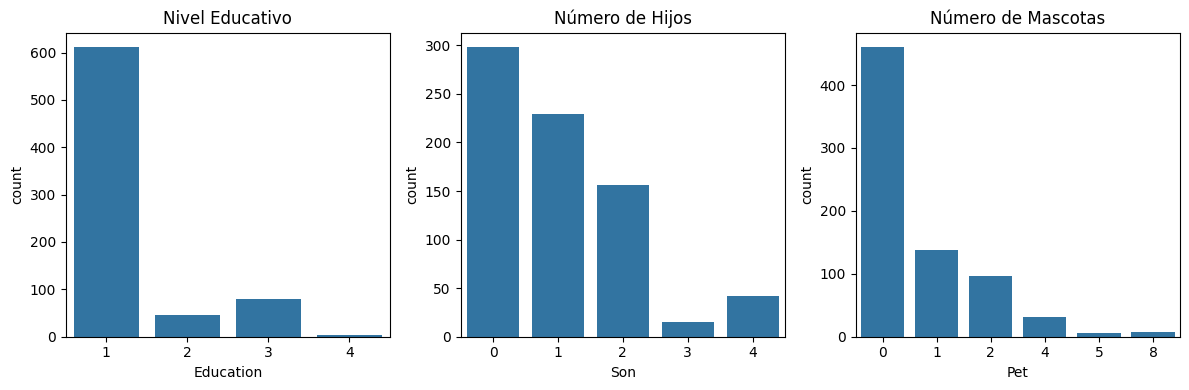

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='Education', data=df_RRHH)
plt.title("Nivel Educativo")

plt.subplot(1, 3, 2)
sns.countplot(x='Son', data=df_RRHH)
plt.title("Número de Hijos")

plt.subplot(1, 3, 3)
sns.countplot(x='Pet', data=df_RRHH)
plt.title("Número de Mascotas")

plt.tight_layout()
plt.show()



* Análisis temporal del absentismo

<Axes: xlabel='Absenteeism_hours', ylabel='Count'>

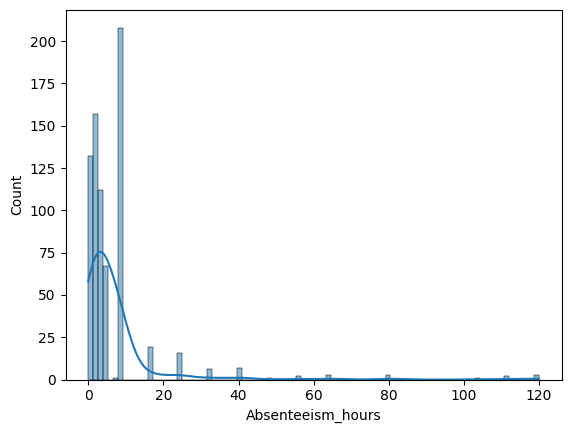

In [10]:
sns.histplot(df_RRHH['Absenteeism_hours'], kde=True)


<Axes: xlabel='Month_absence'>

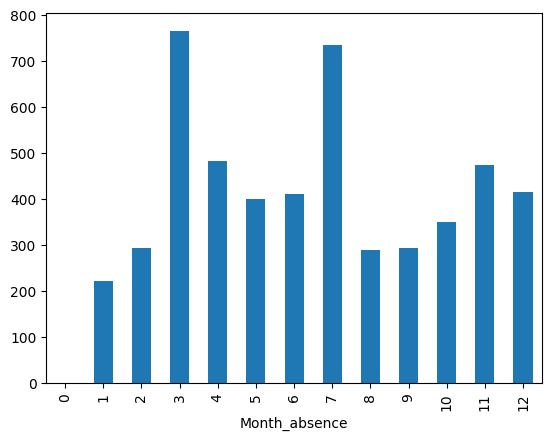

In [ ]:
df_RRHH.groupby('Month_absence')['Absenteeism_hours'].sum().plot(kind='bar')

# destacan Marzo y Abril

<Axes: xlabel='Day_week', ylabel='Absenteeism_hours'>

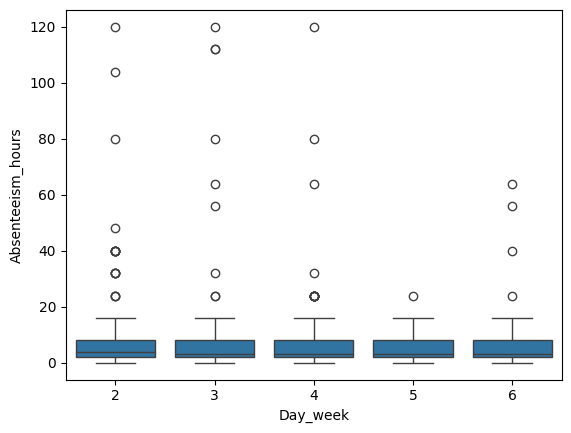

In [ ]:
sns.boxplot(x='Day_week', y='Absenteeism_hours', data=df_RRHH)

# No hay un día con absentismo sistemáticamente más alto
# Muchos outliers. Existen casos puntuales de ausencias prolongadas en todos los días
# Medianas casi iguales, El comportamiento del absentismo es bastante uniforme entre semana

<Axes: xlabel='Seasons', ylabel='Absenteeism_hours'>

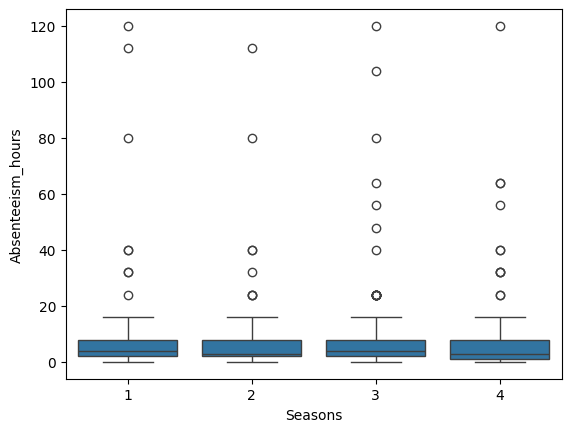

In [ ]:
sns.boxplot(x='Seasons', y='Absenteeism_hours', data=df_RRHH)

<Axes: xlabel='Education', ylabel='Absenteeism_hours'>

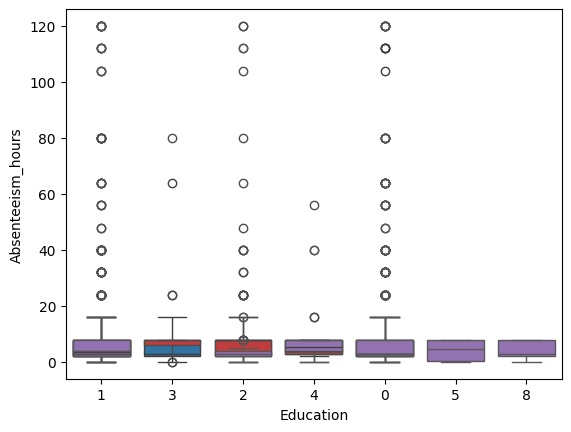

In [21]:
# Por educación
sns.boxplot(x='Education', y='Absenteeism_hours', data=df_RRHH)

# Social drinker / smoker
sns.boxplot(x='Social_drinker', y='Absenteeism_hours', data=df_RRHH)
sns.boxplot(x='Social_smoker', y='Absenteeism_hours', data=df_RRHH)

# Hijos o mascotas
sns.boxplot(x='Son', y='Absenteeism_hours', data=df_RRHH)
sns.boxplot(x='Pet', y='Absenteeism_hours', data=df_RRHH)

* Correlaciones entre variables numéricas

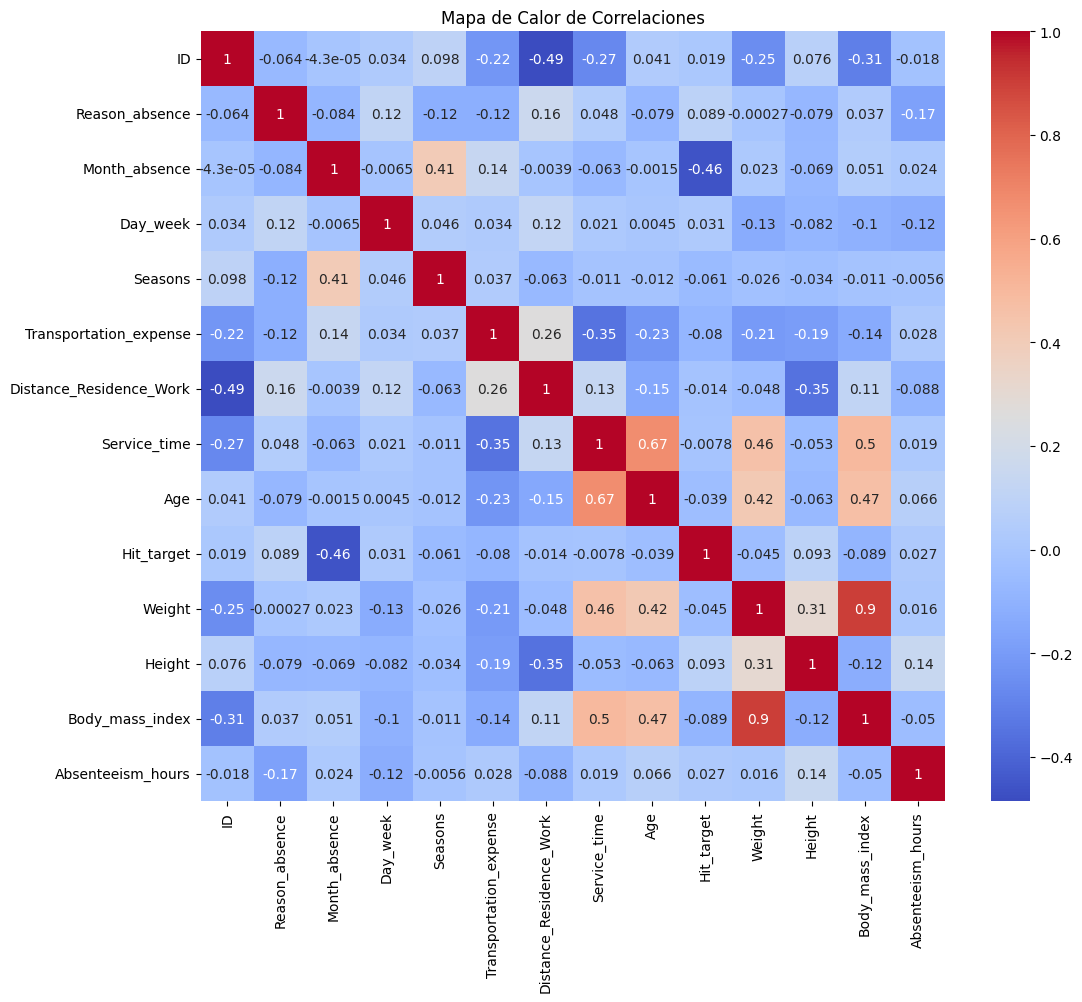

In [38]:
# Mapa de calor
plt.figure(figsize=(12, 10))
corr = df_RRHH.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()
